In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!ls /content/

 model	 sample_data   Test  'Test (2).zip'   Train


In [2]:
!mkdir '/content/Train'

In [ ]:
!mv '/content/Train.zip' '/content/Train/'

In [3]:
!mkdir '/content/Test'

In [4]:
!mkdir '/content/model/'

In [ ]:
!mv '/content/Test.zip' '/content/Test/'

In [7]:
!unzip '/content/Train/Train.zip'

Archive:  /content/Train/Train.zip
  inflating: 1Hundrednote/1.jpg      
  inflating: 1Hundrednote/10.jpg     
  inflating: 1Hundrednote/11.jpg     
  inflating: 1Hundrednote/13.jpg     
  inflating: 1Hundrednote/18.jpg     
  inflating: 1Hundrednote/2.jpg      
  inflating: 1Hundrednote/20.jpg     
  inflating: 1Hundrednote/21.jpg     
  inflating: 1Hundrednote/22.jpg     
  inflating: 1Hundrednote/23.jpg     
  inflating: 1Hundrednote/24.jpg     
  inflating: 1Hundrednote/25.jpg     
  inflating: 1Hundrednote/27.jpg     
  inflating: 1Hundrednote/28.jpg     
  inflating: 1Hundrednote/29.jpg     
  inflating: 1Hundrednote/3.jpg      
  inflating: 1Hundrednote/30.jpg     
  inflating: 1Hundrednote/4.jpg      
  inflating: 1Hundrednote/5.jpg      
  inflating: 1Hundrednote/6.jpg      
  inflating: 1Hundrednote/7.jpg      
  inflating: 1Hundrednote/8.jpg      
  inflating: 2Hundrednote/1.jpg      
  inflating: 2Hundrednote/10.jpg     
  inflating: 2Hundrednote/11.jpg     
  inflating: 2H

In [6]:
!unzip '/content/Test/Test.zip'

Archive:  /content/Test/Test.zip
replace Test/1Hundrednote/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: Test/1Hundrednote/1.jpg  
  inflating: Test/1Hundrednote/14.jpg  
  inflating: Test/1Hundrednote/15.jpg  
  inflating: Test/1Hundrednote/16.jpg  
  inflating: Test/1Hundrednote/2.jpg  
  inflating: Test/1Hundrednote/3.jpg  
  inflating: Test/2Hundrednote/1.jpg  
  inflating: Test/2Hundrednote/2.jpg  
  inflating: Test/2Hundrednote/3.jpg  
  inflating: Test/2Hundrednote/31.jpg  
  inflating: Test/2Hundrednote/32.jpg  
  inflating: Test/2Hundrednote/33.jpg  
  inflating: Test/2Thousandnote/1.jpg  
  inflating: Test/2Thousandnote/2.jpg  
  inflating: Test/2Thousandnote/3.jpg  
  inflating: Test/2Thousandnote/31.jpg  
  inflating: Test/2Thousandnote/32.jpg  
  inflating: Test/2Thousandnote/33.jpg  
  inflating: Test/5Hundrednote/1.jpg  
  inflating: Test/5Hundrednote/2.jpg  
  inflating: Test/5Hundrednote/3.jpg  
  inflating: Test/5Hundrednote/31.jpg  
  inflating: Test/

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [9]:
ROOTPATH = '/content'
DATAPATH= ROOTPATH+'/Train'
TRAINPATH = ROOTPATH+'/Train'
TESTPATH =  ROOTPATH+'/Test'
MODELPATH = ROOTPATH+'/model/'

In [ ]:
!ls /content/Train/

1Hundrednote  2Hundrednote  2Thousandnote  5Hundrednote  Fiftynote  Tennote  Twentynote


In [13]:
_1Hundrednote=glob.glob(DATAPATH+'/1Hundrednote/*')# [/content/Test/1Hundrednote/1.jpg,/content/Test/1Hundrednote/2.jpg]
_2Hundrednote=glob.glob(DATAPATH+'/2Hundrednote/*')
_2Thousandnote=glob.glob(DATAPATH+'/2Thousandnote/*')
_5Hundrednote=glob.glob(DATAPATH+'/5Hundrednote/*')
_Fiftynote=glob.glob(DATAPATH+'/Fiftynote/*')
_Tennote=glob.glob(DATAPATH+'/Tennote/*')
_Twentynote=glob.glob(DATAPATH+'/Twentynote/*')

In [14]:
print(len(_1Hundrednote),_1Hundrednote)
print(len(_2Hundrednote),_2Hundrednote)
print(len(_2Thousandnote),_2Thousandnote)
print(len(_2Thousandnote),_2Thousandnote)
print(len(_5Hundrednote),_5Hundrednote)
print(len(_Fiftynote),_Fiftynote)
print(len(_Tennote),_Tennote)
print(len(_Twentynote),_Twentynote)

22 ['/content/Train/1Hundrednote/4.jpg', '/content/Train/1Hundrednote/11.jpg', '/content/Train/1Hundrednote/21.jpg', '/content/Train/1Hundrednote/13.jpg', '/content/Train/1Hundrednote/25.jpg', '/content/Train/1Hundrednote/28.jpg', '/content/Train/1Hundrednote/2.jpg', '/content/Train/1Hundrednote/18.jpg', '/content/Train/1Hundrednote/29.jpg', '/content/Train/1Hundrednote/3.jpg', '/content/Train/1Hundrednote/22.jpg', '/content/Train/1Hundrednote/8.jpg', '/content/Train/1Hundrednote/27.jpg', '/content/Train/1Hundrednote/10.jpg', '/content/Train/1Hundrednote/7.jpg', '/content/Train/1Hundrednote/1.jpg', '/content/Train/1Hundrednote/30.jpg', '/content/Train/1Hundrednote/23.jpg', '/content/Train/1Hundrednote/24.jpg', '/content/Train/1Hundrednote/20.jpg', '/content/Train/1Hundrednote/5.jpg', '/content/Train/1Hundrednote/6.jpg']
22 ['/content/Train/2Hundrednote/4.jpg', '/content/Train/2Hundrednote/26.jpg', '/content/Train/2Hundrednote/11.jpg', '/content/Train/2Hundrednote/21.jpg', '/content/Tra

In [15]:
dataset_classes=[_1Hundrednote,_2Hundrednote,_2Thousandnote,_5Hundrednote,_Fiftynote,_Tennote,_Twentynote]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  7


In [16]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        )  # Specify the validation split



Found 125 images belonging to 8 classes.
Found 28 images belonging to 8 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 42 images belonging to 8 classes.


In [18]:
training_set.class_indices

{'.ipynb_checkpoints': 0,
 '1Hundrednote': 1,
 '2Hundrednote': 2,
 '2Thousandnote': 3,
 '5Hundrednote': 4,
 'Fiftynote': 5,
 'Tennote': 6,
 'Twentynote': 7}

In [19]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  8


In [20]:
print("Shape of training set:", training_set.image_shape)

Shape of training set: (224, 224, 3)


In [21]:
print("Shape of training set:", validation_set.image_shape)

Shape of training set: (224, 224, 3)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten

In [23]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(8, activation='softmax'))

In [25]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14981448 (57.15 MB)
Trainable params: 266760 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [26]:
vgg16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

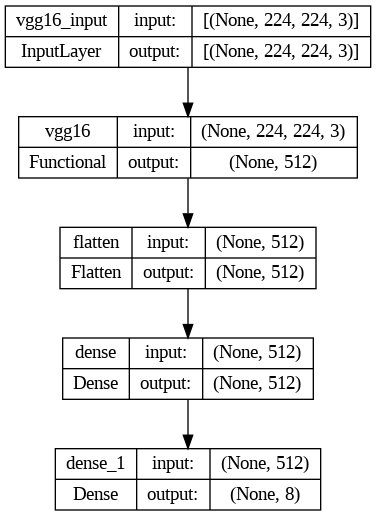

In [27]:
from tensorflow.keras.utils import plot_model

# Plot the model and save it to an image file
plot_model(vgg16_model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'VGG16_Pretrained.model.best.hdf5', verbose=1 ,save_best_only=True)

In [30]:
history=vgg16_model.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2.2720 - accuracy: 0.1600
Epoch 1: val_loss improved from inf to 2.25137, saving model to /content/model/VGG16_Pretrained.model.best.hdf5
8/8 [==============================] - 16s 1s/step - loss: 2.2720 - accuracy: 0.1600 - val_loss: 2.2514 - val_accuracy: 0.1786
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 1.9124 - accuracy: 0.3680
Epoch 2: val_loss improved from 2.25137 to 1.74465, saving model to /content/model/VGG16_Pretrained.model.best.hdf5
8/8 [==============================] - 3s 328ms/step - loss: 1.9124 - accuracy: 0.3680 - val_loss: 1.7447 - val_accuracy: 0.3571
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.5496 - accuracy: 0.4240
Epoch 3: val_loss improved from 1.74465 to 1.55062, saving model to /content/model/VGG16_Pretrained.model.best.hdf5
8/8 [==============================] - 4s 489ms/step - loss: 1.5496 - accuracy: 0.4240 - val_loss: 1.5506 - val_accuracy: 0.4286
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1.3974 - accuracy: 0.4640
Epoch 4: val_loss improved from 1.55062 to 1.51211, saving model to /content/model/VGG16_Pretrained.model.best.hdf5
8/8 [==============================] - 3s 328ms/step - loss: 1.3974 - accuracy: 0.4640 - val_loss: 1.5121 - val_accuracy: 0.5000


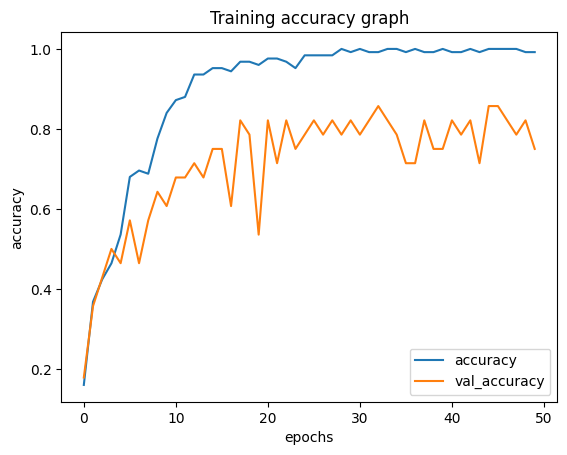

In [31]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

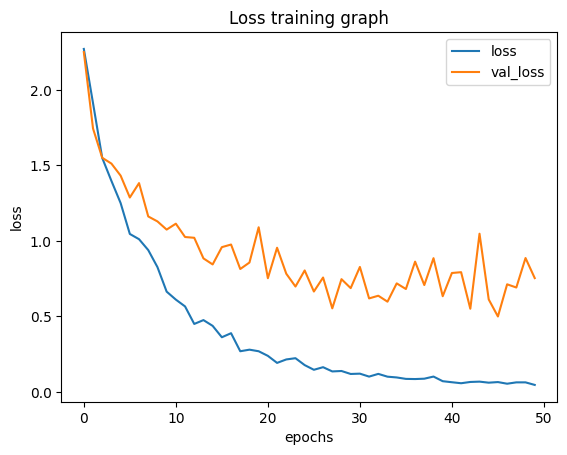

In [32]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [33]:
test_loss,test_accuracy=vgg16_model.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

3/3 [==============================] - 3s 1s/step - loss: 1.1546 - accuracy: 0.6429
Test Loss:  1.1546310186386108
Test Accuracy:  0.6428571343421936


In [34]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  64.28571343421936


In [35]:
predicted_result=vgg16_model.predict(test_set)
predicted_result[:5]

3/3 [==============================] - 0s 87ms/step


array([[1.6346118e-07, 9.0310216e-01, 9.4300704e-03, 1.5244492e-03,
        5.8278019e-05, 4.6440167e-03, 1.1646249e-02, 6.9594547e-02],
       [7.8369970e-07, 8.2756177e-02, 1.2216610e-02, 1.8757635e-03,
        1.9149543e-04, 8.0890574e-02, 8.1139974e-02, 7.4092865e-01],
       [1.0971662e-06, 3.1259072e-01, 5.9706833e-02, 1.4478811e-04,
        1.9144529e-04, 3.0253306e-01, 7.0643939e-02, 2.5418821e-01],
       [1.5412869e-06, 7.4867809e-01, 8.6827306e-03, 3.2772534e-02,
        2.7515375e-04, 2.3179189e-03, 1.0074695e-02, 1.9719736e-01],
       [1.7059615e-07, 9.8380512e-01, 4.8967809e-03, 7.8356266e-04,
        8.5782576e-03, 5.0648488e-04, 1.2500278e-03, 1.7957791e-04]],
      dtype=float32)

In [36]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([1, 7, 1, 1, 1])

In [37]:
test_classes=test_set.classes
test_classes

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7],
      dtype=int32)

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[4 0 0 0 0 0 2]
 [0 4 2 0 0 0 0]
 [0 2 3 0 0 0 1]
 [0 1 1 2 0 1 1]
 [1 0 0 0 3 2 0]
 [0 0 0 0 0 6 0]
 [1 0 0 0 0 0 5]]


<Axes: >

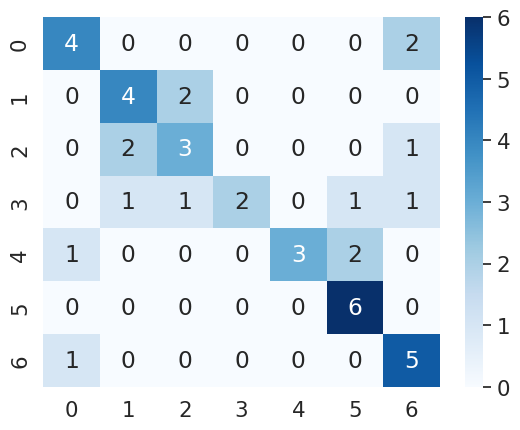

In [39]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [40]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.6428571428571429


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.95      1.00      0.98        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       0.95      0.95      0.95        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       1.00      0.96      0.98        72
           8       1.00      1.00      1.00        72

    accuracy                           0.99       575
   macro avg       0.99      0.99      0.99       575
weighted avg       0.99      0.99      0.99       575



In [ ]:
import time
t = time.time()

export_path_keras = "/content/model/Model_11_vgg16_Pretrained{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
vgg16_model.save(export_path_keras)


Final Thesis/Saved Model/Model_11_vgg16_Pretrained0.9895651936531067_model_1647614762.h5


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,981,961
Trainable params: 267,273
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

30
(None, 9)


In [ ]:
reload_model.layers

In [ ]:
t = time.time()

export_path_sm = "/content/model/Model_11_vgg16_Pretrained {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(vgg16_model, export_path_sm)

Final Thesis/Saved Model/Model_11_vgg16_Pretrained 0.9895651936531067 Model 1647614786
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_11_vgg16_Pretrained 0.9895651936531067 Model 1647614786/assets


In [ ]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [ ]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(*, vgg16_input) at 0x7FEC33365250>

In [ ]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fec35bc25d0>

In [ ]:
model=reload_model

In [ ]:
def noteclass(cls):
    txt=pyttsx3.init()
    # if cls==0:
    #     ans="Two Taka"
    #     print(ans)
    #     txt.say(ans)
    #     txt.runAndWait()
    # el
    if cls==1:
        ans="1Hundrednote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="2Hundrednote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="2Thousandnote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==4:
        ans="5Hundrednote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="Fiftynote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Tennote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Twentynote"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="NA"
        print(ans)
        txt.say(ans)
        txt.runAndWait()


In [ ]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('/content/Test/Tennote/3.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))